    1.產生兩個折線圖(Uniformly Randomly Array & Almost Sorted Array)，分別放入五條折線(五種sorted的方法)，x軸為陣列大小，y軸為時間
    2.每個sorting演算法的程式碼來源。
    3.實驗環境(CPU = i5-8265U ; RAM = 8.0G ; GPU = NVIDIA GeFroce MX250)。
    4.實驗程式碼。

    Input Array 大小 2^k (k= 10,11,12,...,30)的平均時間。且每個k都需要跑十次，並計算出平均時間。

#### Algorithm
    insertion sort =>        https://www.geeksforgeeks.org/insertion-sort/
    merge sort =>            https://www.educative.io/edpresso/merge-sort-in-python
    randomized quick sort => https://www.codementor.io/@garethdwyer/quicksort-tutorial-python-implementation-with-line-by-line-explanation-p9h7jd3r6
    counting sort =>         https://en.wikibooks.org/wiki/Algorithm_Implementation/Sorting/Counting_sort
    Heap sort =>             https://www.programiz.com/dsa/heap-sort

### Sorted

#### Insertion Sort

In [1]:
def insertion_sort(list): #in-place
    
    for i in range(1, len(list)): #第一個元素固定，從第二個開始
        tmp = list[i]
        j = i - 1 #固定元素的前一個數字
        while j >= 0 and tmp < list[j]:
            list[j + 1] = list[j] #值向右
            j = j - 1
        list[ j + 1 ] = tmp

#### Merge Sort

In [2]:
def MergeSort(myList):
    if len(myList) > 1:
        mid = len(myList) // 2
        left = myList[:mid]
        right = myList[mid:]

        # Recursive call on each half
        MergeSort(left)
        MergeSort(right)

        # Two iterators for traversing the two halves
        i = 0
        j = 0
        
        # Iterator for the main list
        k = 0
        
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
              # The value from the left half has been used
              myList[k] = left[i]
              # Move the iterator forward
              i += 1
            else:
                myList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1

        # For all the remaining values
        while i < len(left):
            myList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            myList[k]=right[j]
            j += 1
            k += 1

#### Quick Sort

In [3]:
def quick_sort2(list, left, right): #in-place
    if left >= right:
        return list
    key = list[left]
    left_pivot = left
    right_pivot = right
    while left_pivot < right_pivot:
        while left_pivot < right_pivot and list[right_pivot] >= key: #從左向右找小於key值的
            right_pivot = right_pivot - 1
        while left_pivot < right_pivot and list[left_pivot] <= key: #從右向左找大於key值的
            left_pivot = left_pivot + 1
        if left_pivot < right_pivot:
            list[left_pivot], list[right_pivot] = list[right_pivot], list[left_pivot]
    list[left], list[left_pivot] = list[left_pivot], list[left] #跟key值交換
    quick_sort2(list, left, left_pivot - 1)
    quick_sort2(list, right_pivot + 1, right)
    return list

def quick_sort(list):
    return quick_sort2(list, 0, len(list)-1)

In [4]:
def partition(arr,low,high): 
    i = ( low-1 )         # index of smaller element 
    pivot = arr[high]     # pivot 
  
    for j in range(low , high): 
  
        # If current element is smaller than or 
        # equal to pivot 
        if   arr[j] <= pivot: 
          
            # increment index of smaller element 
            i = i+1 
            arr[i],arr[j] = arr[j],arr[i] 
  
    arr[i+1],arr[high] = arr[high],arr[i+1] 
    return ( i+1 ) 
  
# The main function that implements QuickSort 
# arr[] --> Array to be sorted, 
# low  --> Starting index, 
# high  --> Ending index 
  
# Function to do Quick sort 
def quickSort2(arr,low,high): 
    if low < high: 
  
        # pi is partitioning index, arr[p] is now 
        # at right place 
        pi = partition(arr,low,high) 
  
        # Separately sort elements before 
        # partition and after partition 
        quickSort2(arr, low, pi-1) 
        quickSort2(arr, pi+1, high) 

def quickSort(arr):
    return quickSort2(arr, 0, len(arr)-1)

#### Counting Sort

In [4]:
def counting_sort(array, maxval):
    """in-place counting sort"""
    m = maxval + 1
    count = [0] * m               # init with zeros
    for a in array:
        count[a] += 1             # count occurences
    i = 0
    for a in range(m):            # emit
        for c in range(count[a]): # - emit 'count[a]' copies of 'a'
            array[i] = a
            i += 1
    return (array,count)

#### Heap Sort

In [5]:
  def heapify(arr, n, i):
      # Find largest among root and children
      largest = i
      l = 2 * i + 1
      r = 2 * i + 2
  
      if l < n and arr[i] < arr[l]:
          largest = l
  
      if r < n and arr[largest] < arr[r]:
          largest = r
  
      # If root is not largest, swap with largest and continue heapifying
      if largest != i:
          arr[i], arr[largest] = arr[largest], arr[i]
          heapify(arr, n, largest)
  
  
  def heapSort(arr):
      n = len(arr)
  
      # Build max heap
      for i in range(n, -1, -1):
          heapify(arr, n, i)
  
      for i in range(n-1, 0, -1):
          # Swap
          arr[i], arr[0] = arr[0], arr[i]
  
          # Heapify root element
          heapify(arr, i, 0)

# Test.2 Uniformly Randomly Input Array

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time

In [111]:
U_R_Input_list = []

for k in range(10, 21):
    U_R_Input = np.random.randint(1, 1001, size=[2**k]) # Uniformly Randomly Input Array 1
    U_R_Input_list.append(U_R_Input)
print(U_R_Input_list)

[array([ 24, 921, 925, ..., 229, 537,  31]), array([903, 385,   7, ..., 164, 316, 907]), array([608, 540, 254, ..., 700, 796, 356]), array([425, 822, 564, ...,  75, 392, 357]), array([828, 933, 876, ..., 201, 630, 381]), array([189, 453,  18, ...,  48, 882, 371]), array([490,  99, 282, ..., 623, 624, 769]), array([402, 930, 514, ..., 106, 878, 712]), array([ 61, 461, 897, ..., 473, 227, 874]), array([594,   1,  75, ..., 631, 961, 815]), array([431,  67, 837, ..., 425, 132, 958])]


In [132]:
time_list_IS = []

for k in range(0, len(U_R_Input_list)-5):
    time_num_IS = []
    
    for i in range(0, 10):
        U_R_Copy_Input = U_R_Input_list[k].copy()
        # Insertion Sort
        start_time = time.time()

        insertion_sort(U_R_Copy_Input)

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_IS.append(spend_time)
        
    time_list_IS.append(time_num_IS)

In [133]:
time_list_IS

[[0.1078953742980957,
  0.10368061065673828,
  0.10329747200012207,
  0.10265731811523438,
  0.10518479347229004,
  0.10396552085876465,
  0.11063671112060547,
  0.10200214385986328,
  0.10296964645385742,
  0.10608887672424316],
 [0.41699862480163574,
  0.4217696189880371,
  0.42195749282836914,
  0.41972970962524414,
  0.5553662776947021,
  0.6329905986785889,
  0.6023516654968262,
  0.536639928817749,
  0.4486880302429199,
  0.43416643142700195],
 [1.76332688331604,
  1.7311830520629883,
  1.746891736984253,
  1.9566469192504883,
  1.7387332916259766,
  1.6970431804656982,
  1.66135573387146,
  1.800149917602539,
  1.9558639526367188,
  1.775740623474121],
 [7.039853572845459,
  7.516467571258545,
  7.144896984100342,
  7.593605041503906,
  8.042515516281128,
  7.588009834289551,
  7.2320075035095215,
  7.527002334594727,
  7.743910074234009,
  7.558261394500732],
 [30.33378791809082,
  32.028952836990356,
  32.16709232330322,
  34.04000759124756,
  32.42025375366211,
  31.910272359

In [112]:
time_list_MS = []

for k in range(0, len(U_R_Input_list)):
    time_num_MS = []
    
    for i in range(0, 10):
        U_R_Copy_Input = U_R_Input_list[k].copy()
        # Merge Sort
        start_time = time.time()

        MergeSort(U_R_Copy_Input)

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_MS.append(spend_time)
        
    time_list_MS.append(time_num_MS)

In [113]:
time_list_MS

[[0.00598454475402832,
  0.008976936340332031,
  0.007994890213012695,
  0.0059661865234375,
  0.006022214889526367,
  0.006975889205932617,
  0.005987405776977539,
  0.00698089599609375,
  0.006979703903198242,
  0.005985736846923828],
 [0.013965129852294922,
  0.012955665588378906,
  0.013962507247924805,
  0.012966156005859375,
  0.012964010238647461,
  0.013963460922241211,
  0.012965202331542969,
  0.013962268829345703,
  0.012970209121704102,
  0.013960838317871094],
 [0.028919696807861328,
  0.02991962432861328,
  0.029922008514404297,
  0.02991795539855957,
  0.014082670211791992,
  0.04488348960876465,
  0.029919862747192383,
  0.028923749923706055,
  0.029918909072875977,
  0.02991962432861328],
 [0.06482601165771484,
  0.06482720375061035,
  0.06479668617248535,
  0.06386470794677734,
  0.06482291221618652,
  0.06482434272766113,
  0.06582331657409668,
  0.07277536392211914,
  0.06785273551940918,
  0.06583833694458008],
 [0.1441960334777832,
  0.14060449600219727,
  0.14064

In [114]:
time_list_CS = []

for k in range(0, len(U_R_Input_list)):
    time_num_CS = []
    
    for i in range(0, 10):
        U_R_Copy_Input = U_R_Input_list[k].copy()
        # Counting Sort
        start_time = time.time()

        counting_sort(U_R_Copy_Input, 1000)

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_CS.append(spend_time)
        
    time_list_CS.append(time_num_CS)

In [115]:
time_list_CS

[[0.000997781753540039,
  0.0010004043579101562,
  0.0,
  0.0009937286376953125,
  0.0,
  0.0019941329956054688,
  0.0,
  0.0009987354278564453,
  0.0,
  0.0009958744049072266],
 [0.0009968280792236328,
  0.0,
  0.000997304916381836,
  0.0009975433349609375,
  0.0009970664978027344,
  0.0,
  0.000997781753540039,
  0.0009970664978027344,
  0.0009970664978027344,
  0.0009980201721191406],
 [0.0009970664978027344,
  0.002004861831665039,
  0.0019865036010742188,
  0.0009961128234863281,
  0.0019960403442382812,
  0.0019922256469726562,
  0.00099945068359375,
  0.0009961128234863281,
  0.001993417739868164,
  0.0009975433349609375],
 [0.001994609832763672,
  0.001994609832763672,
  0.0029921531677246094,
  0.0019943714141845703,
  0.0029921531677246094,
  0.0019948482513427734,
  0.0019943714141845703,
  0.0019948482513427734,
  0.0019948482513427734,
  0.0029916763305664062],
 [0.0050067901611328125,
  0.005013227462768555,
  0.003988981246948242,
  0.004995822906494141,
  0.004936695098

In [116]:
time_list_QS = []

for k in range(0, len(U_R_Input_list)):
    time_num_QS = []
    
    for i in range(0, 10):
        U_R_Copy_Input = U_R_Input_list[k].copy()
        # Quick Sort
        start_time = time.time()

        quick_sort(U_R_Copy_Input)

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_QS.append(spend_time)
        
    time_list_QS.append(time_num_QS)

In [117]:
time_list_QS

[[0.0049479007720947266,
  0.004022836685180664,
  0.004007101058959961,
  0.005934000015258789,
  0.0049877166748046875,
  0.004036664962768555,
  0.003988027572631836,
  0.003941059112548828,
  0.003988504409790039,
  0.004034996032714844],
 [0.00997304916381836,
  0.008976221084594727,
  0.00897836685180664,
  0.010963916778564453,
  0.008984565734863281,
  0.00998687744140625,
  0.008957862854003906,
  0.00897979736328125,
  0.008972406387329102,
  0.008977413177490234],
 [0.019948482513427734,
  0.01699066162109375,
  0.02308511734008789,
  0.019947290420532227,
  0.01994800567626953,
  0.019945144653320312,
  0.019946575164794922,
  0.019960403442382812,
  0.01993250846862793,
  0.019955873489379883],
 [0.04385948181152344,
  0.03993678092956543,
  0.04665970802307129,
  0.042885780334472656,
  0.042885541915893555,
  0.04388308525085449,
  0.04285621643066406,
  0.04391169548034668,
  0.042884111404418945,
  0.04285597801208496],
 [0.10175704956054688,
  0.10073065757751465,
  0

In [118]:
time_list_HS = []

for k in range(0, len(U_R_Input_list)):
    time_num_HS = []
    
    for i in range(0, 10):
        U_R_Copy_Input = U_R_Input_list[k].copy()
        # Heap Sort
        start_time = time.time()

        heapSort(U_R_Copy_Input)

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_HS.append(spend_time)
        
    time_list_HS.append(time_num_HS)

In [119]:
time_list_HS

[[0.017949581146240234,
  0.014959573745727539,
  0.013961076736450195,
  0.011005401611328125,
  0.009969711303710938,
  0.009978771209716797,
  0.010965108871459961,
  0.009974002838134766,
  0.00997614860534668,
  0.01096653938293457],
 [0.022939205169677734,
  0.023936986923217773,
  0.01870131492614746,
  0.03801274299621582,
  0.023935556411743164,
  0.0229341983795166,
  0.023937702178955078,
  0.02293705940246582,
  0.022948741912841797,
  0.022930622100830078],
 [0.05186104774475098,
  0.05185747146606445,
  0.05186295509338379,
  0.05086183547973633,
  0.050864458084106445,
  0.050864458084106445,
  0.05086207389831543,
  0.05086827278137207,
  0.050873517990112305,
  0.057836294174194336],
 [0.11259913444519043,
  0.11663246154785156,
  0.11398863792419434,
  0.11368727684020996,
  0.11469721794128418,
  0.11169743537902832,
  0.11369729042053223,
  0.11169886589050293,
  0.11369633674621582,
  0.11269879341125488],
 [0.2611532211303711,
  0.24634099006652832,
  0.2463419437

### 預測

#### Insertion Sort 2^10 ~ 2^15每次所花的時間

In [25]:
time_mean_IS_UR = []
time_list_IS_UR = [[0.1078953742980957,  0.10368061065673828,  0.10329747200012207,  0.10265731811523438,  0.10518479347229004,  0.10396552085876465,  0.11063671112060547,  0.10200214385986328,  0.10296964645385742,  0.10608887672424316],
 [0.41699862480163574,  0.4217696189880371,  0.42195749282836914,  0.41972970962524414,  0.5553662776947021,  0.6329905986785889,  0.6023516654968262,  0.536639928817749,  0.4486880302429199,  0.43416643142700195],
 [1.76332688331604,  1.7311830520629883,  1.746891736984253,  1.9566469192504883,  1.7387332916259766,  1.6970431804656982,  1.66135573387146,  1.800149917602539,  1.9558639526367188,  1.775740623474121],
 [7.039853572845459,  7.516467571258545,  7.144896984100342,  7.593605041503906,  8.042515516281128,  7.588009834289551,  7.2320075035095215,  7.527002334594727,  7.743910074234009,  7.558261394500732],
 [30.33378791809082,  32.028952836990356,  32.16709232330322,  34.04000759124756,  32.42025375366211,  31.910272359848022,  31.51435661315918,  31.473640203475952,  34.420929193496704,  31.837872743606567],
 [126.15327858924866,  129.9659857749939,  130.59765243530273,  129.77565503120422,  130.98859310150146,  128.42279362678528,  127.58434295654297,  133.6344277858734,  128.16621208190918,  122.34550714492798]]

#### Merge Sort 2^10 ~ 2^20每次所花的時間

In [17]:
time_mean_MS_UR = []
time_list_MS_UR = [[0.00598454475402832,  0.008976936340332031,  0.007994890213012695,  0.0059661865234375,  0.006022214889526367,  0.006975889205932617,  0.005987405776977539,  0.00698089599609375,  0.006979703903198242,  0.005985736846923828],
 [0.013965129852294922,  0.012955665588378906,  0.013962507247924805,  0.012966156005859375,  0.012964010238647461,  0.013963460922241211,  0.012965202331542969,  0.013962268829345703,  0.012970209121704102,  0.013960838317871094],
 [0.028919696807861328,  0.02991962432861328,  0.029922008514404297,  0.02991795539855957,  0.014082670211791992,  0.04488348960876465,  0.029919862747192383,  0.028923749923706055,  0.029918909072875977,  0.02991962432861328],
 [0.06482601165771484,  0.06482720375061035,  0.06479668617248535,  0.06386470794677734,  0.06482291221618652,  0.06482434272766113,  0.06582331657409668,  0.07277536392211914,  0.06785273551940918,  0.06583833694458008],
 [0.1441960334777832,  0.14060449600219727,  0.1406407356262207,  0.13960838317871094,  0.14163780212402344,  0.13775873184204102,  0.14417648315429688,  0.14064526557922363,  0.13762903213500977,  0.14062833786010742],
 [0.33106160163879395,  0.41463518142700195,  0.2922182083129883,  0.28623437881469727,  0.2899296283721924,  0.29421544075012207,  0.29720234870910645,  0.29720640182495117,  0.29619836807250977,  0.29822421073913574],
 [0.640023946762085,  0.6372997760772705,  0.6372945308685303,  0.6389787197113037,  0.6453781127929688,  0.6362802982330322,  0.6392874717712402,  0.6372196674346924,  0.6443254947662354,  0.6412830352783203],
 [1.758279800415039,  1.3500781059265137,  1.365347146987915,  1.3634541034698486,  1.3653459548950195,  1.366295337677002,  1.3713297843933105,  1.6880199909210205,  1.4777600765228271,  1.372347116470337],
 [2.915083885192871,  3.0570249557495117,  3.14756178855896,  3.4701921939849854,  3.1832659244537354,  2.9291141033172607,  3.3411498069763184,  2.9691340923309326,  2.895425796508789,  2.8981540203094482],
 [6.419573545455933,  7.675741195678711,  6.105462074279785,  6.151506185531616,  6.111318111419678,  6.814995050430298,  7.333319425582886,  6.132166385650635,  6.211853981018066,  6.175163507461548],
 [12.942635297775269,  13.389361143112183,  14.38095211982727,  13.064668416976929,  13.47617244720459,  14.177631616592407,  13.01317572593689,  13.010291337966919,  13.234423398971558,  14.046783924102783]]

#### Counting Sort 2^10 ~ 2^20每次所花的時間

In [18]:
time_mean_CS_UR = []
time_list_CS_UR = [[0.000997781753540039,  0.0010004043579101562,  0.0,  0.0009937286376953125,  0.0,  0.0019941329956054688,  0.0,  0.0009987354278564453,  0.0,  0.0009958744049072266],
 [0.0009968280792236328,  0.0,  0.000997304916381836,  0.0009975433349609375,  0.0009970664978027344,  0.0,  0.000997781753540039,  0.0009970664978027344,  0.0009970664978027344,  0.0009980201721191406],
 [0.0009970664978027344,  0.002004861831665039,  0.0019865036010742188,  0.0009961128234863281,  0.0019960403442382812,  0.0019922256469726562,  0.00099945068359375,  0.0009961128234863281,  0.001993417739868164,  0.0009975433349609375],
 [0.001994609832763672,  0.001994609832763672,  0.0029921531677246094,  0.0019943714141845703,  0.0029921531677246094,  0.0019948482513427734,  0.0019943714141845703,  0.0019948482513427734,  0.0019948482513427734,  0.0029916763305664062],
 [0.0050067901611328125,  0.005013227462768555,  0.003988981246948242,  0.004995822906494141,  0.004936695098876953,  0.004035234451293945,  0.004983425140380859,  0.0039424896240234375,  0.005037546157836914,  0.004935026168823242],
 [0.007978200912475586,  0.007978439331054688,  0.008976221084594727,  0.006981372833251953,  0.008975744247436523,  0.007978677749633789,  0.007979631423950195,  0.007977724075317383,  0.008975982666015625,  0.0010986328125],
 [0.024010896682739258,  0.015957117080688477,  0.01598811149597168,  0.015957355499267578,  0.015956640243530273,  0.01595783233642578,  0.01595783233642578,  0.015956878662109375,  0.015959501266479492,  0.015955686569213867],
 [0.030920982360839844,  0.031880855560302734,  0.03194761276245117,  0.03287982940673828,  0.03194427490234375,  0.03091716766357422,  0.03191637992858887,  0.03191351890563965,  0.03191971778869629,  0.03290605545043945],
 [0.06480908393859863,  0.06483078002929688,  0.06482768058776855,  0.06582307815551758,  0.05390310287475586,  0.08332490921020508,  0.11742973327636719,  0.1385042667388916,  0.13069558143615723,  0.06381630897521973],
 [0.1346430778503418,  0.13563966751098633,  0.13364195823669434,  0.13355231285095215,  0.13457202911376953,  0.14030885696411133,  0.13366055488586426,  0.13264203071594238,  0.13463449478149414,  0.13563966751098633],
 [0.2701094150543213,  0.28922319412231445,  0.28038477897644043,  0.2732672691345215,  0.27217864990234375,  0.27826571464538574,  0.2712857723236084,  0.27285289764404297,  0.27725863456726074,  0.44959354400634766]]

#### Quick Sort 2^10 ~ 2^20每次所花的時間

In [19]:
time_mean_QS_UR = []
time_list_QS_UR = [[0.0049479007720947266,  0.004022836685180664,  0.004007101058959961,  0.005934000015258789,  0.0049877166748046875,  0.004036664962768555,  0.003988027572631836,  0.003941059112548828,  0.003988504409790039,  0.004034996032714844],
 [0.00997304916381836,  0.008976221084594727,  0.00897836685180664,  0.010963916778564453,  0.008984565734863281,  0.00998687744140625,  0.008957862854003906,  0.00897979736328125,  0.008972406387329102,  0.008977413177490234],
 [0.019948482513427734,  0.01699066162109375,  0.02308511734008789,  0.019947290420532227,  0.01994800567626953,  0.019945144653320312,  0.019946575164794922,  0.019960403442382812,  0.01993250846862793,  0.019955873489379883],
 [0.04385948181152344,  0.03993678092956543,  0.04665970802307129,  0.042885780334472656,  0.042885541915893555,  0.04388308525085449,  0.04285621643066406,  0.04391169548034668,  0.042884111404418945,  0.04285597801208496],
 [0.10175704956054688,  0.10073065757751465,  0.10132026672363281,  0.08986091613769531,  0.11778116226196289,  0.10170650482177734,  0.10074973106384277,  0.09973311424255371,  0.10073137283325195,  0.10073518753051758],
 [0.24516510963439941,  0.24432373046875,  0.2453441619873047,  0.24396586418151855,  0.24016141891479492,  0.2520923614501953,  0.24534821510314941,  0.24534368515014648,  0.24634122848510742,  0.2455129623413086],
 [0.6442780494689941,  0.6439647674560547,  0.6412844657897949,  0.6419210433959961,  0.6506209373474121,  0.6448187828063965,  0.6472525596618652,  0.6442747116088867,  0.646287202835083,  0.642845869064331],
 [1.9398107528686523,  1.9403798580169678,  1.9506895542144775,  1.938873529434204,  1.9398117065429688,  1.9597265720367432,  1.967682123184204,  1.945817470550537,  1.9091479778289795,  2.2058587074279785],
 [11.180465459823608,  6.807910919189453,  6.4798712730407715,  6.467695951461792,  6.424926996231079,  6.431205749511719,  7.116029262542725,  6.471887826919556,  6.988463640213013,  6.421461820602417],
 [26.84496521949768,  24.76145577430725,  22.991896867752075,  23.04049777984619,  23.951824188232422,  23.027777910232544,  27.54260015487671,  32.28691792488098,  39.66169834136963,  45.259416341781616],
 [141.11740565299988,  92.99719882011414,  91.50428891181946,  93.21872401237488,  93.44114780426025,  99.97048568725586,  93.42505764961243,  93.58247923851013,  93.14434957504272,  91.20770144462585]]

#### Heap Sort 2^10 ~ 2^20每次所花的時間

In [20]:
time_mean_HS_UR = []
time_list_HS_UR = [[0.017949581146240234,  0.014959573745727539, 0.013961076736450195,  0.011005401611328125,  0.009969711303710938,  0.009978771209716797,  0.010965108871459961,  0.009974002838134766,  0.00997614860534668,  0.01096653938293457],
 [0.022939205169677734,  0.023936986923217773,  0.01870131492614746,  0.03801274299621582,  0.023935556411743164,  0.0229341983795166,  0.023937702178955078,  0.02293705940246582,  0.022948741912841797,  0.022930622100830078],
 [0.05186104774475098,  0.05185747146606445,  0.05186295509338379,  0.05086183547973633,  0.050864458084106445,  0.050864458084106445,  0.05086207389831543,  0.05086827278137207,  0.050873517990112305,  0.057836294174194336],
 [0.11259913444519043,  0.11663246154785156,  0.11398863792419434,  0.11368727684020996,  0.11469721794128418,  0.11169743537902832,  0.11369729042053223,  0.11169886589050293,  0.11369633674621582,  0.11269879341125488],
 [0.2611532211303711,  0.24634099006652832,  0.24634194374084473,  0.24434518814086914,  0.24523186683654785,  0.24535083770751953,  0.24234867095947266,  0.24434709548950195,  0.2462940216064453,  0.2453479766845703],
 [0.5245907306671143,  0.5264308452606201,  0.5234756469726562,  0.5285537242889404,  0.6103699207305908,  0.5305755138397217,  0.52260422706604,  0.5245938301086426,  0.5275900363922119,  0.5245788097381592],
 [1.122013807296753,  1.1158082485198975,  1.1245582103729248,  1.125885248184204,  1.121997356414795,  1.110550880432129,  1.1120078563690186,  1.1190028190612793,  1.119006633758545,  1.1248955726623535],
 [2.4115993976593018,  2.4115488529205322,  2.486243963241577,  2.4165170192718506,  2.4154610633850098,  2.7811195850372314,  2.4186675548553467,  2.4095540046691895,  2.385634183883667,  2.4035701751708984],
 [5.112328767776489,  5.143402338027954,  5.093576431274414,  5.15397047996521,  5.139403581619263,  5.132533550262451,  6.721189260482788,  5.1611106395721436,  5.039518356323242,  5.2783730030059814],
 [10.74013900756836,  10.730565786361694,  10.729756355285645,  10.724806070327759,  11.01412296295166,  12.263676881790161,  10.667657136917114,  11.174949884414673,  14.97368860244751,  12.818609714508057],
 [24.396068334579468,  23.18239712715149,  23.140522718429565,  23.147063493728638,  22.8928005695343,  28.180588245391846,  32.1625440120697,  25.9975745677948,  25.923232078552246,  24.906436443328857]]

#### 取平均

In [26]:
for i in range(0, len(time_list_IS_UR)):
    mean_time = np.mean(time_list_IS_UR[i])
    time_mean_IS_UR.append(mean_time)

In [84]:
time_mean_IS_UR

[0.10483784675598144,
 0.48906583786010743,
 1.7826935291290282,
 7.498652982711792,
 32.21471655368805,
 128.76344485282897]

In [28]:
for i in range(0, len(time_list_MS_UR)):
    mean_time = np.mean(time_list_MS_UR[i])
    time_mean_MS_UR.append(mean_time)

In [85]:
time_mean_MS_UR

[0.006785440444946289,
 0.013463544845581054,
 0.029632759094238282,
 0.06602516174316406,
 0.14075253009796143,
 0.3097125768661499,
 0.6397371053695678,
 1.4478257417678833,
 3.080610656738281,
 6.513109946250916,
 13.47360954284668]

In [30]:
for i in range(0, len(time_list_CS_UR)):
    mean_time = np.mean(time_list_CS_UR[i])
    time_mean_CS_UR.append(mean_time)

In [86]:
time_mean_CS_UR

[0.0006980657577514649,
 0.0007978677749633789,
 0.0014959335327148437,
 0.002293848991394043,
 0.0046875238418579105,
 0.0074900627136230465,
 0.016765785217285157,
 0.03191463947296143,
 0.08479645252227783,
 0.13489346504211425,
 0.29344198703765867]

In [32]:
for i in range(0, len(time_list_QS_UR)):
    mean_time = np.mean(time_list_QS_UR[i])
    time_mean_QS_UR.append(mean_time)

In [87]:
time_mean_QS_UR

[0.004388880729675293,
 0.009375047683715821,
 0.0199660062789917,
 0.04326183795928955,
 0.10151059627532959,
 0.24535987377166749,
 0.6447548389434814,
 1.9697798252105714,
 7.078991889953613,
 28.93690505027771,
 98.36088387966156]

In [34]:
for i in range(0, len(time_list_HS_UR)):
    mean_time = np.mean(time_list_HS_UR[i])
    time_mean_HS_UR.append(mean_time)

In [88]:
time_mean_HS_UR

[0.011970591545104981,
 0.02432141304016113,
 0.051861238479614255,
 0.11350934505462647,
 0.2467101812362671,
 0.5343363285064697,
 1.1195726633071899,
 2.4539915800094603,
 5.297540640830993,
 11.583797240257264,
 25.39292275905609]

In [43]:
x = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
IS_x = [10, 11, 12, 13, 14, 15]

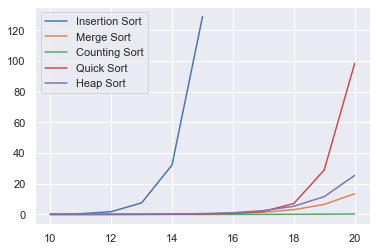

In [56]:
plt.plot(IS_x, time_mean_IS_UR, label='Insertion Sort')
plt.plot(x, time_mean_MS_UR, label='Merge Sort')
plt.plot(x, time_mean_CS_UR, label='Counting Sort')
plt.plot(x, time_mean_QS_UR, label='Quick Sort')
plt.plot(x, time_mean_HS_UR, label='Heap Sort')
plt.legend()

#### 由多項式回歸預測2^20以後所需花費的時間

In [62]:
import seaborn; seaborn.set()
import numpy as np

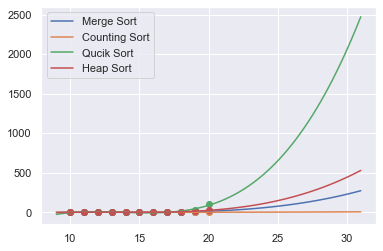

In [72]:
model_M = np.poly1d(np.polyfit(x, time_mean_MS_UR, 3))
line_M = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_MS_UR)

model_C = np.poly1d(np.polyfit(x, time_mean_CS_UR, 3))
line_C = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_CS_UR)

model_Q = np.poly1d(np.polyfit(x, time_mean_QS_UR, 3))
line_Q = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_QS_UR)

model_H = np.poly1d(np.polyfit(x, time_mean_HS_UR, 3))
line_H = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_HS_UR)

plt.plot(line_M, model_M(line_M), label='Merge Sort')
plt.plot(line_C, model_C(line_C), label='Counting Sort')
plt.plot(line_Q, model_Q(line_Q), label='Qucik Sort')
plt.plot(line_H, model_H(line_H), label='Heap Sort')

plt.legend()

## Insertion Sort 時間推估
    從 2 的 20次方開始估計
    10 => 0.1s    11 => 0.5s    12 => 1.8s    13 => 7.5s
    14 => 32.2s   15 => 128.75s 16 => 300s    17 => 580s
    18 => 970s    19 => 1500s   20 => 2300s   21 => 3000s
    22 => 4100s   23 => 5600s   24 => 7100s   25 => 9000s
    26 => 10900s  27 => 13000s  28 => 16250s  29 => 19000s
    30 => 24000s

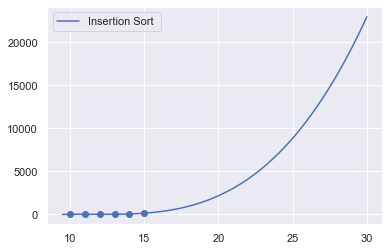

In [81]:
model_I = np.poly1d(np.polyfit(IS_x, time_mean_IS_UR, 3))
line_I = np.linspace(9.5, 30, 100)
plt.scatter(IS_x, time_mean_IS_UR)
plt.plot(line_I, model_I(line_I), label='Insertion Sort ')
plt.legend()

## Merge Sort時間推估
    從 2 的 20次方開始估計
    10 => 0.0068s    11 => 0.0134s    12 => 0.03s    13 => 0.066s
    14 => 0.14s      15 => 0.31s      16 => 0.64s    17 => 1.448s
    18 => 3.08s      19 => 6.51s      20 => 13.5s    21 => 20s
    22 => 30s        23 => 44s        24 => 59s      25 => 78s
    26 => 100s       27 => 120s       28 => 150s     29 => 190s
    30 => 230s

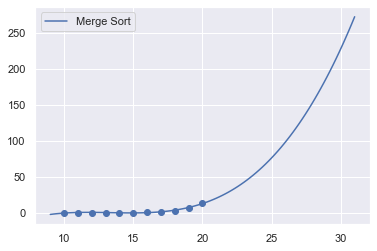

In [74]:
model_M = np.poly1d(np.polyfit(x, time_mean_MS_UR, 3))
line_M = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_MS_UR)
plt.plot(line_M, model_M(line_M), label='Merge Sort')
plt.legend()

## Counting Sort時間推估
    從 2 的 20次方開始估計
    10 => 0.0007s    11 => 0.0008s    12 => 0.0015s    13 => 0.0023s
    14 => 0.0047s    15 => 0.0075s    16 => 0.0167s    17 => 0.032s
    18 => 0.085s     19 => 0.135s     20 => 0.3s       21 => 0.44s
    22 => 0.62s      23 => 0.9s       24 => 1.2s       25 => 1.62s
    26 => 2.1s       27 => 2.7s       28 => 3.25s     29 => 3.95s
    30 => 4.75s

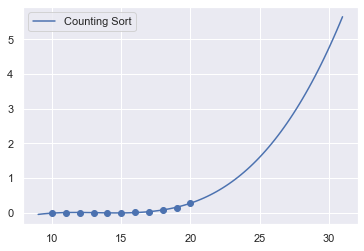

In [125]:
model_C = np.poly1d(np.polyfit(x, time_mean_CS_UR, 3))
line_C = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_CS_UR)
plt.plot(line_C, model_C(line_C), label='Counting Sort')
plt.legend()

## Quick Sort時間推估
    從 2 的 20次方開始估計
    10 => 0.0044s   11 => 0.0094s    12 => 0.02s     13 => 0.043s
    14 => 0.1s      15 => 0.25s      16 => 0.645s    17 => 2s
    18 => 7.1s      19 => 29s        20 => 98s       21 => 150s
    22 => 280s      23 => 345s       24 => 495s      25 => 625s
    26 => 850s      27 => 1100s      28 => 1375s     29 => 1312s
    30 => 2055s

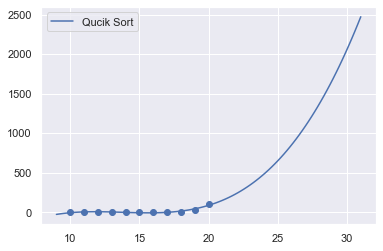

In [137]:
model_Q = np.poly1d(np.polyfit(x, time_mean_QS_UR, 3))
line_Q = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_QS_UR)
plt.plot(line_Q, model_Q(line_Q), label='Qucik Sort')
plt.legend()

## Heap Sort時間推估
    從 2 的 20次方開始估計
    10 => 0.012s    11 => 0.024s    12 => 0.052s    13 => 0.1135s
    14 => 0.25s      15 => 0.53s      16 => 1.12s    17 => 2.454s
    18 => 5.3s      19 => 11.6s      20 => 25.4s    21 => 38s
    22 => 57s        23 => 81s        24 => 111s      25 => 148s
    26 => 187s       27 => 245s       28 => 300s     29 => 370s
    30 => 440s

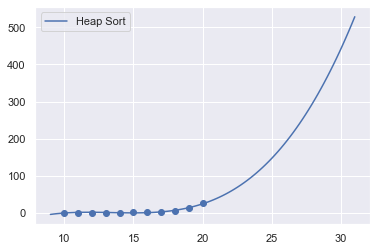

In [148]:
model_H = np.poly1d(np.polyfit(x, time_mean_HS_UR, 3))
line_H = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_HS_UR)
plt.plot(line_H, model_H(line_H), label='Heap Sort')
plt.legend()

# Test.2 Almost Sorted Input Array

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import time

In [12]:
A_S_Input_list = []

for k in range(10, 16):
    A_S_Input = np.arange(1, 2**k+1) # Unfinished Input Array 2

    change_array = np.random.randint(1, 1001, size=[2**k]) # the change table
    position_num = np.random.randint(0, 2**k, size=[100]) # the position should be change

    for i in position_num:
        A_S_Input[i] = change_array[i] # Input Array 2 is complete
            
    A_S_Input_list.append(A_S_Input)

In [9]:
A_S_Input_list

[array([   1,    2,    3, ..., 1022, 1023, 1024]),
 array([   1,    2,    3, ..., 2046,  469, 2048]),
 array([   1,    2,    3, ..., 4094, 4095, 4096]),
 array([   1,    2,    3, ..., 8190, 8191, 8192]),
 array([    1,     2,     3, ..., 16382, 16383, 16384])]

In [123]:
time_list_IS = [] #range 10~22

for k in range(0, len(A_S_Input_list)):
    time_num_IS = []
    
    for i in range(0, 10):
        A_S_Copy_Input = A_S_Input_list[k].copy()
        # Insertion Sort
        start_time = time.time()

        insertion_sort(A_S_Copy_Input)

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_IS.append(spend_time)
        
    time_list_IS.append(time_num_IS)

In [124]:
time_list_IS

[[0.015953779220581055,
  0.015003204345703125,
  0.014077425003051758,
  0.013962745666503906,
  0.012965202331542969,
  0.0030710697174072266,
  0.026045560836791992,
  0.01496577262878418,
  0.013958930969238281,
  0.013962030410766602],
 [0.025931358337402344,
  0.024935245513916016,
  0.026925325393676758,
  0.026928424835205078,
  0.02593231201171875,
  0.026926040649414062,
  0.02693009376525879,
  0.026926040649414062,
  0.026927471160888672,
  0.02792978286743164],
 [0.07081222534179688,
  0.07080745697021484,
  0.07378625869750977,
  0.06783008575439453,
  0.07179450988769531,
  0.07280516624450684,
  0.07195663452148438,
  0.06894135475158691,
  0.07975649833679199,
  0.13035178184509277],
 [0.2879624366760254,
  0.2762608528137207,
  0.23505377769470215,
  0.1442563533782959,
  0.1506335735321045,
  0.15259313583374023,
  0.15059924125671387,
  0.14261484146118164,
  0.15259337425231934,
  0.23969674110412598],
 [0.426375150680542,
  0.330798864364624,
  0.3310830593109131,

In [125]:
time_list_MS = []

for k in range(0, len(A_S_Input_list)):
    time_num_MS = []
    
    for i in range(0, 10):
        A_S_Copy_Input = A_S_Input_list[k].copy()
        # Insertion Sort
        start_time = time.time()

        MergeSort(A_S_Copy_Input)

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_MS.append(spend_time)
        
    time_list_MS.append(time_num_MS)

In [126]:
time_list_MS

[[0.008975028991699219,
  0.007978677749633789,
  0.0059833526611328125,
  0.005984067916870117,
  0.005984067916870117,
  0.005983829498291016,
  0.004986763000488281,
  0.005984067916870117,
  0.005983829498291016,
  0.005984067916870117],
 [0.011968612670898438,
  0.013972997665405273,
  0.01794147491455078,
  0.02194356918334961,
  0.015957355499267578,
  0.014010429382324219,
  0.012964487075805664,
  0.013962984085083008,
  0.01391291618347168,
  0.013999223709106445],
 [0.026935338973999023,
  0.026917695999145508,
  0.02792954444885254,
  0.026920795440673828,
  0.026929378509521484,
  0.026926517486572266,
  0.026929616928100586,
  0.026926517486572266,
  0.026927471160888672,
  0.026927947998046875],
 [0.05984759330749512,
  0.05983304977416992,
  0.05984354019165039,
  0.05884051322937012,
  0.05884838104248047,
  0.05884742736816406,
  0.05982708930969238,
  0.05984067916870117,
  0.09172391891479492,
  0.10574889183044434],
 [0.1296076774597168,
  0.129655122756958,
  0.12

In [127]:
time_list_CS = []

for k in range(0, len(A_S_Input_list)):
    time_num_CS = []
    
    for i in range(0, 10):
        A_S_Copy_Input = A_S_Input_list[k].copy()
        # Counting Sort
        start_time = time.time()

        counting_sort(A_S_Copy_Input, 2**(10+k))

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_CS.append(spend_time)
        
    time_list_CS.append(time_num_CS)

In [128]:
time_list_CS

[[0.0009860992431640625,
  0.000995635986328125,
  0.0010216236114501953,
  0.0,
  0.0010106563568115234,
  0.0,
  0.0009596347808837891,
  0.0,
  0.0009965896606445312,
  0.0],
 [0.0009982585906982422,
  0.0019936561584472656,
  0.001994609832763672,
  0.0009975433349609375,
  0.002991914749145508,
  0.0009980201721191406,
  0.0009982585906982422,
  0.001993417739868164,
  0.0009968280792236328,
  0.000997304916381836],
 [0.0029916763305664062,
  0.0019960403442382812,
  0.001993417739868164,
  0.001995086669921875,
  0.0029921531677246094,
  0.001993894577026367,
  0.0019948482513427734,
  0.001994609832763672,
  0.001994609832763672,
  0.001994609832763672],
 [0.003964662551879883,
  0.003989219665527344,
  0.003989219665527344,
  0.003989458084106445,
  0.004986763000488281,
  0.003989219665527344,
  0.003989219665527344,
  0.003989458084106445,
  0.003989219665527344,
  0.003989696502685547],
 [0.009006738662719727,
  0.007979393005371094,
  0.008946657180786133,
  0.0090262889862

In [13]:
time_list_QS = [] # range 10~15
 
for k in range(0, len(A_S_Input_list)):
    time_num_QS = []
    
    for i in range(0, 10):
        A_S_Copy_Input = A_S_Input_list[k].copy()
        # Quick Sort
        start_time = time.time()

        quickSort(A_S_Copy_Input)

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_QS.append(spend_time)
        
    time_list_QS.append(time_num_QS)

In [14]:
time_list_QS

[[0.017951488494873047,
  0.018982648849487305,
  0.010973215103149414,
  0.009938716888427734,
  0.009007453918457031,
  0.010967493057250977,
  0.008975028991699219,
  0.01592850685119629,
  0.012999773025512695,
  0.009968280792236328],
 [0.049869537353515625,
  0.06479501724243164,
  0.05488133430480957,
  0.049867868423461914,
  0.05581951141357422,
  0.050863027572631836,
  0.04986739158630371,
  0.0498659610748291,
  0.050864219665527344,
  0.04787158966064453],
 [0.12161970138549805,
  0.14287304878234863,
  0.1309373378753662,
  0.1318354606628418,
  0.15218257904052734,
  0.12368535995483398,
  0.12668871879577637,
  0.15255141258239746,
  0.13371729850769043,
  0.12308812141418457],
 [0.9408185482025146,
  0.9525487422943115,
  0.9420619010925293,
  0.8618333339691162,
  0.853703498840332,
  0.8768448829650879,
  0.9511270523071289,
  0.8307597637176514,
  0.8807671070098877,
  0.872697114944458],
 [5.234843730926514,
  5.37920880317688,
  5.112085580825806,
  5.201346397399

In [8]:
time_list_HS = []

for k in range(0, len(A_S_Input_list)):
    time_num_HS = []
    
    for i in range(0, 10):
        A_S_Copy_Input = A_S_Input_list[k].copy()
        # Heap Sort
        start_time = time.time()

        heapSort(A_S_Copy_Input)

        end_time = time.time()
        spend_time = end_time - start_time
        time_num_HS.append(spend_time)
        
    time_list_HS.append(time_num_HS)

In [9]:
time_list_HS

[[0.01495981216430664,
  0.016953468322753906,
  0.019945621490478516,
  0.011967658996582031,
  0.01499485969543457,
  0.009720325469970703,
  0.012474536895751953,
  0.009984254837036133,
  0.009984970092773438,
  0.012428522109985352],
 [0.02501368522644043,
  0.027553796768188477,
  0.025209426879882812,
  0.025919675827026367,
  0.026226282119750977,
  0.0270693302154541,
  0.027655601501464844,
  0.024941205978393555,
  0.02904224395751953,
  0.03195810317993164],
 [0.054393768310546875,
  0.052584171295166016,
  0.05338454246520996,
  0.05486297607421875,
  0.05253314971923828,
  0.05435633659362793,
  0.054985761642456055,
  0.0531461238861084,
  0.05433964729309082,
  0.05498909950256348],
 [0.12343192100524902,
  0.11889815330505371,
  0.11756443977355957,
  0.12543177604675293,
  0.1229701042175293,
  0.12765049934387207,
  0.18688702583312988,
  0.13706731796264648,
  0.16672039031982422,
  0.17205166816711426],
 [0.3332786560058594,
  0.4597015380859375,
  0.34004378318786

### 預測

#### Insertion Sort 2^10 ~ 2^22每次所花的時間

In [155]:
time_mean_IS_AS = []
time_list_IS_AS = [[0.015953779220581055,  0.015003204345703125,  0.014077425003051758,  0.013962745666503906,  0.012965202331542969,  0.0030710697174072266,  0.026045560836791992,  0.01496577262878418,  0.013958930969238281,  0.013962030410766602],
 [0.025931358337402344,  0.024935245513916016,  0.026925325393676758,  0.026928424835205078,  0.02593231201171875,  0.026926040649414062,  0.02693009376525879,  0.026926040649414062,  0.026927471160888672,  0.02792978286743164],
 [0.07081222534179688,  0.07080745697021484,  0.07378625869750977,  0.06783008575439453,  0.07179450988769531,  0.07280516624450684,  0.07195663452148438,  0.06894135475158691,  0.07975649833679199,  0.13035178184509277],
 [0.2879624366760254,  0.2762608528137207,  0.23505377769470215,  0.1442563533782959,  0.1506335735321045, 0.15259313583374023,  0.15059924125671387,  0.14261484146118164,  0.15259337425231934,  0.23969674110412598],
 [0.426375150680542,  0.330798864364624,  0.3310830593109131,  0.33510375022888184,  0.3390793800354004,  0.3311154842376709,  0.33211421966552734,  0.3291192054748535,  0.3221454620361328,  0.3260927200317383],
 [0.6801979541778564,  0.6691925525665283,  0.6793928146362305,  0.6721692085266113,  0.6781857013702393, 0.6522550582885742,  0.66721510887146,  0.6622281074523926,  0.674091100692749,  0.6554760932922363],
 [1.321099042892456,  1.3194711208343506,  1.3172895908355713,  1.311377763748169,  1.3065049648284912, 1.2986745834350586,  1.3324356079101562,  1.2982590198516846,  1.3314299583435059,  1.3184916973114014],
 [2.68070650100708,  2.6439273357391357,  2.6617627143859863,  2.6718506813049316,  2.8580451011657715,  4.220326900482178,  2.6989235877990723,  2.6724448204040527,  2.6528561115264893,  2.648594379425049],
 [5.276579141616821,  5.425853967666626,  5.301696300506592,  5.304229021072388,  5.541959047317505,  6.09537410736084,  5.381310939788818,  5.853260517120361,  5.29163122177124,  5.220837831497192],
 [9.7454195022583,  10.945703744888306,  9.655272483825684,  10.467219591140747,  13.68339991569519,  9.723006010055542,  9.980610847473145,  9.720597743988037,  10.211238145828247,  9.832157611846924],
 [20.144381284713745,  22.53896999359131,  23.44186305999756,  20.667198181152344,  20.789576053619385,  20.710529804229736,  20.89095377922058,  20.919405460357666,  21.006715297698975,  20.803100109100342],
 [47.13103461265564,  48.63839507102966,  48.335033893585205,  50.814399003982544,  48.08424401283264,  48.34796953201294,  51.25345778465271,  50.22726392745972,  48.01191806793213,  51.71984529495239],
 [98.57491993904114,  81.16089296340942,  78.42767834663391, 78.25477004051208,  80.26350784301758,  79.04920053482056,  77.73503422737122,  78.22932481765747,  80.77570343017578,  77.94954752922058]]

#### Merge Sort 2^10 ~ 2^22每次所花的時間

In [156]:
time_mean_MS_AS = []
time_list_MS_AS = [[0.008975028991699219,  0.007978677749633789,  0.0059833526611328125,  0.005984067916870117,  0.005984067916870117,  0.005983829498291016,  0.004986763000488281,  0.005984067916870117,  0.005983829498291016,  0.005984067916870117],
 [0.011968612670898438,  0.013972997665405273,  0.01794147491455078,  0.02194356918334961,  0.015957355499267578,  0.014010429382324219,  0.012964487075805664,  0.013962984085083008,  0.01391291618347168,  0.013999223709106445],
 [0.026935338973999023,  0.026917695999145508,  0.02792954444885254,  0.026920795440673828,  0.026929378509521484,  0.026926517486572266,  0.026929616928100586,  0.026926517486572266,  0.026927471160888672,  0.026927947998046875],
 [0.05984759330749512,  0.05983304977416992,  0.05984354019165039,  0.05884051322937012,  0.05884838104248047,  0.05884742736816406,  0.05982708930969238,  0.05984067916870117,  0.09172391891479492,  0.10574889183044434],
 [0.1296076774597168,  0.129655122756958,  0.12965059280395508,  0.13166260719299316,  0.13063645362854004,  0.1296529769897461,  0.13164782524108887,  0.1306135654449463,  0.14363932609558105,  0.12865924835205078],
 [0.2702782154083252,  0.27525973320007324,  0.2719612121582031,  0.2652409076690674,  0.2652902603149414,  0.2652904987335205, 0.2799711227416992,  0.27223896980285645,  0.268282413482666,  0.2742767333984375],
 [0.5744621753692627,  0.5749094486236572,  0.5764784812927246,  0.5744626522064209,  0.5704574584960938,  0.5732393264770508,  0.5694952011108398,  0.9145042896270752,  0.9714000225067139,  0.5614981651306152],
 [1.2686059474945068,  1.3134393692016602,  1.5466909408569336,  1.2325539588928223,  1.4022314548492432,  1.2187385559082031,  1.221733570098877,  1.2242646217346191,  1.214428424835205,  1.2177097797393799],
 [2.5112812519073486,  2.530461072921753,  2.5831387042999268,  2.5687546730041504,  2.5032718181610107,  2.542848825454712,  2.5641565322875977,  2.570675849914551,  2.5718326568603516,  2.541870355606079],
 [5.250679969787598,  5.374133586883545,  5.1930201053619385,  5.22576379776001,  5.763922929763794,  9.608259439468384,  5.300489664077759,  5.229954242706299,  5.278936386108398,  5.288414239883423],
 [12.866121292114258,  11.547968864440918,  11.369869470596313,  11.3619704246521,  11.336165428161621,  11.309589147567749,  11.302476167678833,  11.366973876953125,  11.308151960372925,  11.278764009475708],
 [25.78437066078186,  25.2867534160614,  25.449594974517822,  30.589503049850464,  23.549740076065063,  30.646491050720215,  30.724424123764038,  23.906126737594604,  30.41321563720703,  23.604217767715454],
 [48.88981509208679,  63.68546438217163,  50.09081792831421,  49.28841304779053,  56.60947346687317,  50.969242572784424,  54.79894542694092,  48.51244044303894,  49.11846709251404,  52.741456747055054]]

#### Counting Sort 2^10 ~ 2^22每次所花的時間

In [157]:
time_mean_CS_AS = []
time_list_CS_AS = [[0.0009860992431640625,  0.000995635986328125,  0.0010216236114501953,  0.0,  0.0010106563568115234,  0.0,  0.0009596347808837891,  0.0,  0.0009965896606445312,  0.0],
 [0.0009982585906982422,  0.0019936561584472656,  0.001994609832763672,  0.0009975433349609375,  0.002991914749145508,  0.0009980201721191406,  0.0009982585906982422,  0.001993417739868164,  0.0009968280792236328,  0.000997304916381836],
 [0.0029916763305664062,  0.0019960403442382812,  0.001993417739868164,  0.001995086669921875,  0.0029921531677246094,  0.001993894577026367,  0.0019948482513427734,  0.001994609832763672,  0.001994609832763672,  0.001994609832763672],
 [0.003964662551879883,  0.003989219665527344,  0.003989219665527344,  0.003989458084106445,  0.004986763000488281,  0.003989219665527344,  0.003989219665527344,  0.003989458084106445,  0.003989219665527344,  0.003989696502685547],
 [0.009006738662719727,  0.007979393005371094,  0.008946657180786133,  0.009026288986206055,  0.008976459503173828,  0.007977485656738281,  0.007976055145263672,  0.007978439331054688,  0.008975744247436523,  0.00797891616821289],
 [0.015032529830932617,  0.027948856353759766,  0.015963315963745117,  0.016953229904174805,  0.01695561408996582,  0.015958547592163086, 0.016953229904174805,  0.016959667205810547,  0.015950679779052734,  0.016953706741333008],
 [0.03291511535644531,  0.03390836715698242,  0.03391575813293457,  0.03390240669250488,  0.0329136848449707,  0.03291797637939453,  0.03489804267883301,  0.03291058540344238,  0.032912492752075195,  0.03391289710998535],
 [0.07241940498352051,  0.06781244277954102,  0.06783461570739746,  0.06781554222106934,  0.06999683380126953,  0.06686878204345703,  0.06781697273254395,  0.06573486328125,  0.06781721115112305,  0.06682157516479492],
 [0.13563966751098633,  0.13464951515197754,  0.13363909721374512,  0.1326606273651123,  0.14241957664489746,  0.1326918601989746,  0.1317451000213623,  0.13568735122680664,  0.13463997840881348,  0.1326899528503418],
 [0.2672889232635498,  0.2652883529663086,  0.26629018783569336,  0.266284704208374,  0.26716160774230957,  0.26926183700561523,  0.2652878761291504,  0.270247220993042,  0.2692427635192871,  0.26628780364990234],
 [0.5325767993927002,  0.5301713943481445,  0.532578706741333,  0.5315825939178467,  0.5325202941894531,  0.5315613746643066,  0.5325818061828613,  0.5335776805877686,  0.5325970649719238,  0.8586573600769043],
 [1.5447297096252441,  1.0628666877746582,  1.062859296798706,  1.0761210918426514, 1.0759899616241455,  1.0627007484436035,  1.0640161037445068,  1.0661664009094238,  1.0660710334777832,  1.0611605644226074],
 [2.1252756118774414,  2.128288984298706,  2.1341891288757324,  2.129862070083618,  2.3167333602905273,  2.129286289215088,  2.127310276031494,  2.13301682472229,  2.6000189781188965,  2.4141862392425537]]


#### Quick Sort 2^10 ~ 2^15每次所花的時間

In [158]:
time_mean_QS_AS = []
time_list_QS_AS = [[0.017951488494873047,  0.018982648849487305,  0.010973215103149414,  0.009938716888427734,  0.009007453918457031,  0.010967493057250977,  0.008975028991699219,  0.01592850685119629,  0.012999773025512695,  0.009968280792236328],
 [0.049869537353515625,  0.06479501724243164,  0.05488133430480957,  0.049867868423461914,  0.05581951141357422,  0.050863027572631836,  0.04986739158630371,  0.0498659610748291,  0.050864219665527344,  0.04787158966064453],
 [0.12161970138549805,  0.14287304878234863,  0.1309373378753662,  0.1318354606628418,  0.15218257904052734,  0.12368535995483398,  0.12668871879577637,  0.15255141258239746,  0.13371729850769043,  0.12308812141418457],
 [0.9408185482025146,  0.9525487422943115,  0.9420619010925293,  0.8618333339691162,  0.853703498840332,  0.8768448829650879,  0.9511270523071289,  0.8307597637176514,  0.8807671070098877,  0.872697114944458],
 [5.234843730926514,  5.37920880317688,  5.112085580825806,  5.201346397399902,  5.509881496429443,  5.046183347702026,  4.882211208343506,  5.044028282165527,  5.144711494445801,  5.399237155914307],
 [15.489336252212524,  12.567654609680176,  13.882699728012085,  12.768874883651733,  13.576388835906982,  12.881913185119629,  13.13838815689087,  13.215900182723999,  13.363785028457642,  13.110409498214722]]

#### Heap Sort 2^10 ~ 2^22每次所花的時間

In [159]:
time_mean_HS_AS = []
time_list_HS_AS = [[0.01495981216430664,  0.016953468322753906,  0.019945621490478516,  0.011967658996582031,  0.01499485969543457,  0.009720325469970703,  0.012474536895751953,  0.009984254837036133,  0.009984970092773438,  0.012428522109985352],
 [0.02501368522644043,  0.027553796768188477,  0.025209426879882812,  0.025919675827026367,  0.026226282119750977,  0.0270693302154541,  0.027655601501464844,  0.024941205978393555,  0.02904224395751953,  0.03195810317993164],
 [0.054393768310546875,  0.052584171295166016,  0.05338454246520996,  0.05486297607421875,  0.05253314971923828,  0.05435633659362793,  0.054985761642456055,  0.0531461238861084,  0.05433964729309082,  0.05498909950256348],
 [0.12343192100524902,  0.11889815330505371,  0.11756443977355957,  0.12543177604675293,  0.1229701042175293,  0.12765049934387207,  0.18688702583312988,  0.13706731796264648,  0.16672039031982422,  0.17205166816711426],
 [0.3332786560058594,  0.4597015380859375,  0.3400437831878662,  0.3385465145111084,  0.39955615997314453,  0.26092958450317383,  0.26885199546813965,  0.301922082901001,  0.30223774909973145, 0.2862391471862793],
 [0.6099832057952881,  0.6273074150085449, 0.6147222518920898,  0.5910422801971436,  0.601351261138916,  0.6992437839508057,  0.585045337677002,  0.6223807334899902,  0.6006402969360352,  0.7994322776794434],
 [1.623441457748413,  1.373380184173584,  1.3832876682281494,  1.3766167163848877,  1.458319902420044,  1.4419200420379639,  1.3287229537963867,  1.3201117515563965,  1.4151942729949951,  1.4164199829101562],
 [3.2211153507232666,  3.594285249710083,  3.8270161151885986,  3.0683250427246094,  2.965299129486084,  2.667470932006836,  2.7314767837524414,  2.870675802230835,  2.6400132179260254,  2.940063714981079],
 [5.998955011367798,  5.8988823890686035,  6.0778374671936035,  6.058079242706299,  6.291047811508179,  5.901808977127075,  5.908245086669922,  5.753072261810303,  6.0525124073028564,  6.045796155929565],
 [13.030318260192871,  12.74613070487976,  12.808127880096436,  12.367347717285156,  12.367333173751831,  12.61807370185852, 12.455891132354736,  12.330524206161499,  12.549883604049683,  12.834620714187622],
 [26.51488423347473,  26.516886711120605,  27.84723973274231,  28.60561752319336,  26.921343326568604,  26.768975973129272,  26.42746138572693,  26.33100938796997,  26.951693534851074,  26.874016523361206],
 [55.906861543655396,  56.23885202407837,  56.246649742126465,  56.6627516746521,  56.51945090293884,  54.40353298187256,  57.48584771156311,  56.58970308303833,  55.62856984138489,  56.69430232048035],
 [122.2425184249878,  116.27810621261597,  118.01818180084229,  118.70878100395203,  116.88800597190857,  116.76156806945801,  119.93029642105103,  120.46175980567932,  123.93543314933777,  120.87186169624329]]

#### 取平均

In [160]:
for i in range(0, len(time_list_IS_AS)):
    mean_time = np.mean(time_list_IS_AS[i])
    time_mean_IS_AS.append(mean_time)

In [183]:
time_mean_IS_AS

[0.014396572113037109,
 0.026629209518432617,
 0.07788419723510742,
 0.19322643280029297,
 0.34030272960662844,
 0.6690403699874878,
 1.3155033349990846,
 2.8409438133239746,
 5.469273209571838,
 10.396462559700012,
 21.191269302368163,
 49.25635612010956,
 81.04205796718597]

In [161]:
for i in range(0, len(time_list_MS_AS)):
    mean_time = np.mean(time_list_MS_AS[i])
    time_mean_MS_AS.append(mean_time)

In [162]:
for i in range(0, len(time_list_CS_AS)):
    mean_time = np.mean(time_list_CS_AS[i])
    time_mean_CS_AS.append(mean_time)

In [163]:
for i in range(0, len(time_list_QS_AS)):
    mean_time = np.mean(time_list_QS_AS[i])
    time_mean_QS_AS.append(mean_time)

In [164]:
for i in range(0, len(time_list_HS_AS)):
    mean_time = np.mean(time_list_HS_AS[i])
    time_mean_HS_AS.append(mean_time)

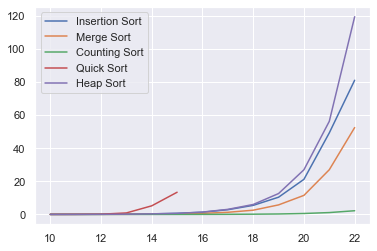

In [181]:
x_AS = np.arange(10, 23)
QA_x = np.arange(10, 16)

plt.plot(x_AS, time_mean_IS_AS, label='Insertion Sort')
plt.plot(x_AS, time_mean_MS_AS, label='Merge Sort')
plt.plot(x_AS, time_mean_CS_AS, label='Counting Sort')
plt.plot(QA_x, time_mean_QS_AS, label='Quick Sort')
plt.plot(x_AS, time_mean_HS_AS, label='Heap Sort')
plt.legend()

#### 由多項式回歸預測2^22以後所需花費的時間


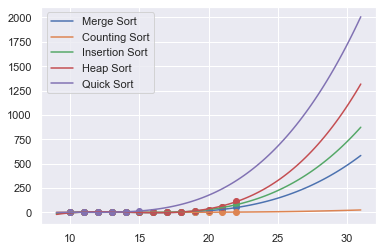

In [189]:
model_M_AS = np.poly1d(np.polyfit(x_AS, time_mean_MS_AS, 3))
line_M_AS = np.linspace(9, 31, 100)
plt.scatter(x_AS, time_mean_MS_AS)

model_C_AS = np.poly1d(np.polyfit(x_AS, time_mean_CS_AS, 3))
line_C_AS = np.linspace(9, 31, 100)
plt.scatter(x_AS, time_mean_CS_AS)

model_I_AS = np.poly1d(np.polyfit(x_AS, time_mean_IS_AS, 3))
line_I_AS = np.linspace(9, 31, 100)
plt.scatter(x_AS, time_mean_IS_AS)

model_H_AS = np.poly1d(np.polyfit(x_AS, time_mean_HS_AS, 3))
line_H_AS = np.linspace(9, 31, 100)
plt.scatter(x_AS, time_mean_HS_AS)

model_Q_AS = np.poly1d(np.polyfit(QA_x, time_mean_QS_AS, 3))
line_Q_AS = np.linspace(9, 31, 100)
plt.scatter(QA_x, time_mean_QS_AS)

plt.plot(line_M_AS, model_M_AS(line_M_AS), label='Merge Sort')
plt.plot(line_C_AS, model_C_AS(line_C_AS), label='Counting Sort')
plt.plot(line_I_AS, model_I_AS(line_I_AS), label='Insertion Sort')
plt.plot(line_H_AS, model_H_AS(line_H_AS), label='Heap Sort')
plt.plot(line_Q_AS, model_Q_AS(line_Q_AS), label='Quick Sort')

plt.legend()

# 統整(答案)

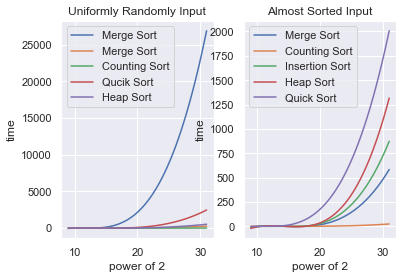

In [199]:
plt.figure()

#Almost Sorted
model_M_AS = np.poly1d(np.polyfit(x_AS, time_mean_MS_AS, 3))
line_M_AS = np.linspace(9, 31, 100)
plt.scatter(x_AS, time_mean_MS_AS)

model_C_AS = np.poly1d(np.polyfit(x_AS, time_mean_CS_AS, 3))
line_C_AS = np.linspace(9, 31, 100)
plt.scatter(x_AS, time_mean_CS_AS)

model_I_AS = np.poly1d(np.polyfit(x_AS, time_mean_IS_AS, 3))
line_I_AS = np.linspace(9, 31, 100)
plt.scatter(x_AS, time_mean_IS_AS)

model_H_AS = np.poly1d(np.polyfit(x_AS, time_mean_HS_AS, 3))
line_H_AS = np.linspace(9, 31, 100)
plt.scatter(x_AS, time_mean_HS_AS)

model_Q_AS = np.poly1d(np.polyfit(QA_x, time_mean_QS_AS, 3))
line_Q_AS = np.linspace(9, 31, 100)
plt.scatter(QA_x, time_mean_QS_AS)

#Uniformly Randomly 
model_I = np.poly1d(np.polyfit(IS_x, time_mean_IS_UR, 3))
line_I = np.linspace(9, 31, 100)
plt.scatter(IS_x, time_mean_IS_UR)

model_M = np.poly1d(np.polyfit(x, time_mean_MS_UR, 3))
line_M = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_MS_UR)

model_C = np.poly1d(np.polyfit(x, time_mean_CS_UR, 3))
line_C = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_CS_UR)

model_Q = np.poly1d(np.polyfit(x, time_mean_QS_UR, 3))
line_Q = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_QS_UR)

model_H = np.poly1d(np.polyfit(x, time_mean_HS_UR, 3))
line_H = np.linspace(9, 31, 100)
plt.scatter(x, time_mean_HS_UR)

plt.subplot(1, 2, 1)

plt.plot(line_I, model_I(line_I), label='Merge Sort')
plt.plot(line_M, model_M(line_M), label='Merge Sort')
plt.plot(line_C, model_C(line_C), label='Counting Sort')
plt.plot(line_Q, model_Q(line_Q), label='Qucik Sort')
plt.plot(line_H, model_H(line_H), label='Heap Sort')

plt.title('Uniformly Randomly Input')
plt.ylabel('time')
plt.xlabel('power of 2')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(line_M_AS, model_M_AS(line_M_AS), label='Merge Sort')
plt.plot(line_C_AS, model_C_AS(line_C_AS), label='Counting Sort')
plt.plot(line_I_AS, model_I_AS(line_I_AS), label='Insertion Sort')
plt.plot(line_H_AS, model_H_AS(line_H_AS), label='Heap Sort')
plt.plot(line_Q_AS, model_Q_AS(line_Q_AS), label='Quick Sort')

plt.title('Almost Sorted Input')
plt.ylabel('time')
plt.xlabel('power of 2')
plt.legend()